In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


raw_data = pd.read_csv(r'C:\Users\Sergey\PycharmProjects\RZD_Digital\Data\dataset_train.csv')
raw_data.head()

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[298, 296, 2, -455, -703, -596, -262, -44, 28,...","[-918, -1078, -450, 640, 1503, 1635, 1083, 589...",1
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[99, 75, -228, -588, -583, -465, -394, -363, -...","[499, 494, 520, 577, 595, 584, 575, 567, 561, ...",0
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[-369, -543, -644, -670, -636, -586, -524, -44...","[263, 444, 548, 576, 539, 485, 419, 331, 266, ...",2
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[-6, -32, -152, -253, -275, -246, -211, -197, ...","[2, 138, 782, 1314, 1471, 1354, 1183, 1127, 10...",1
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79...",2


In [2]:
low_stress = raw_data[raw_data.Class_label==0]
medium_stress = raw_data[raw_data.Class_label==1]
panic_stress = raw_data[raw_data.Class_label==2]


In [3]:
values = [] # all data
vals = raw_data.Data.apply(eval)
res = [val if len(val) == 240 else val + [0] * (240 - len(val)) for val in vals]
vals1 = raw_data.Data_2.apply(eval)
res1 = [val if len(val) == 240 else val + [0] * (240 - len(val)) for val in vals1]

df_1 = pd.DataFrame(res).add_prefix('data')
df_2 = pd.DataFrame(res1).add_prefix('data_new')

additional_data = pd.concat((df_1, df_2), axis=1)

In [4]:
additional_data.head()

,data0,data1,data2,data3,data4,data5,data6,data7,data8,data9,...,data_new230,data_new231,data_new232,data_new233,data_new234,data_new235,data_new236,data_new237,data_new238,data_new239
0,298,296,2,-455,-703,-596,-262,-44,28,92,...,784,440,5,-185,-239,-314,-511,-805,-1148,-1290
1,99,75,-228,-588,-583,-465,-394,-363,-339,-257,...,524,511,489,471,461,464,500,539,565,568
2,-369,-543,-644,-670,-636,-586,-524,-444,-383,-306,...,86,90,187,337,495,567,558,527,507,485
3,-6,-32,-152,-253,-275,-246,-211,-197,-179,-122,...,240,-11,-264,-332,76,799,810,615,548,556
4,165,178,190,202,218,230,200,121,71,81,...,-939,-924,-906,-885,-865,-846,-840,-883,-956,-972


In [5]:
low_stress.head()

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[99, 75, -228, -588, -583, -465, -394, -363, -...","[499, 494, 520, 577, 595, 584, 575, 567, 561, ...",0
22,0c3c37ca-ae71-4b88-a6af-67cd6f1d0099,1,2,9,"[-176, -147, -100, -37, 34, 86, 139, 190, 196,...","[-504, -431, -352, -247, -123, -7, 102, 205, 2...",0
35,aac0b17d-24eb-477f-b383-4f04e747d18b,3,3,2,"[98, 60, -138, -271, -264, -201, -155, -132, -...","[-367, -339, -207, -102, -92, -123, -155, -174...",0
43,5b2721b1-58cc-4095-beda-40e9b3790140,3,3,13,"[126, 195, 260, 295, 324, 350, 72, -440, -485,...","[236, 180, 119, 75, 37, 4, 159, 467, 568, 573,...",0
69,34b30af5-2fb3-4dee-98ee-2398757e8e88,2,2,1,"[82, 81, 49, 20, 2, 9, 20, 25, 30, 35, 41, 46,...","[-273, -259, -94, 54, 152, 134, 86, 46, 18, -1...",0


In [6]:
to_id = (pd.factorize(low_stress.Filename)[0] + 1)
print(low_stress.Filename.unique().shape)
print(medium_stress.Filename.unique().shape)
print(panic_stress.Filename.unique().shape)

(384,)
(389,)
(386,)


In [7]:
# separated data
low_data = []
medium_data = []
panic_data = []
res = [low_data.append(val) if len(val) == 240 else val + [0] * (240 - len(val)) for val in low_stress.Data.apply(eval)]
res = [medium_data.append(val) if len(val) == 240 else val + [0] * (240 - len(val)) for val in medium_stress.Data.apply(eval)]
res = [panic_data.append(val) if len(val) == 240 else val + [0] * (240 - len(val)) for val in panic_stress.Data.apply(eval)]


In [10]:
len(low_data)
res = [values.append(val) if len(val) == 240 else val + [0] * (240 - len(val)) for val in vals]


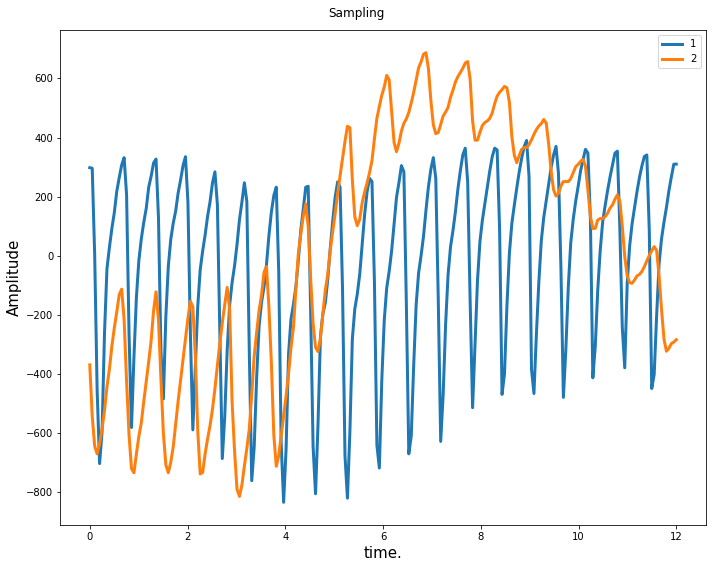

In [11]:
f = 20 # Hz
t = np.linspace(0, 12, 240)
plt.figure(figsize=(10, 8))
plt.suptitle("Sampling")

plt.subplot(1, 1, 1)
plt.plot(t, values[0], linewidth=3, label='1')
plt.plot(t, values[2], linewidth=3, label='2')
plt.xlabel('time.', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()


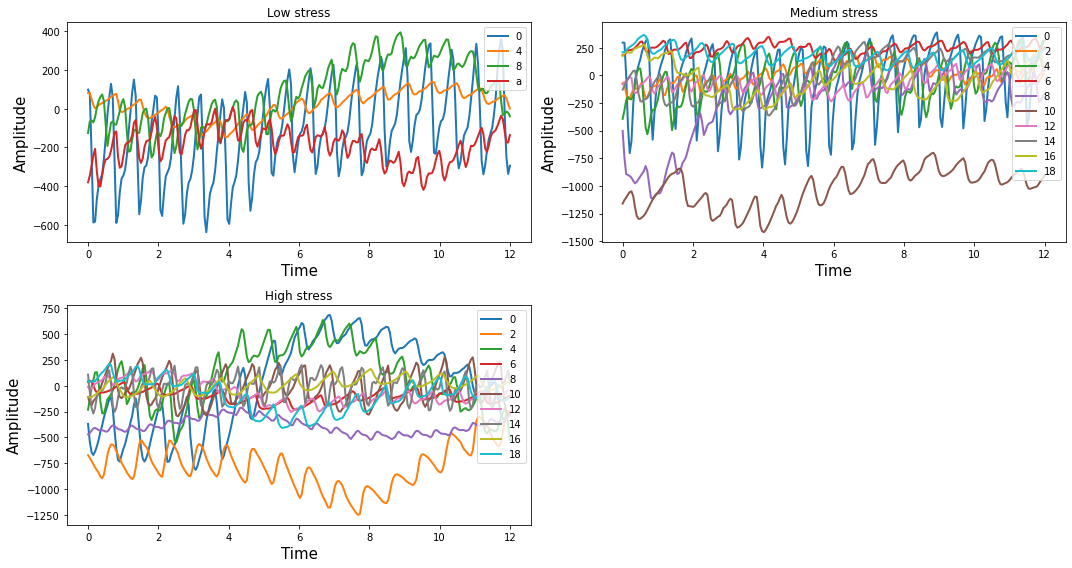

In [12]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.title("Low stress")
for i in range(0,10,4):
    plt.plot(t, low_data[i], linewidth=2, label=str(i))
plt.plot(t, medium_data[3], linewidth=2, label=str("a"))
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')
plt.subplot(2, 2, 2)
plt.title("Medium stress")

for i in range(0,20,2):
    plt.plot(t, medium_data[i], linewidth=2, label=str(i))
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 3)
plt.title("High stress")
for i in range(0,20,2):
    plt.plot(t, panic_data[i], linewidth=2, label=str(i))
plt.legend(fontsize=10, loc='upper right')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)

plt.tight_layout()


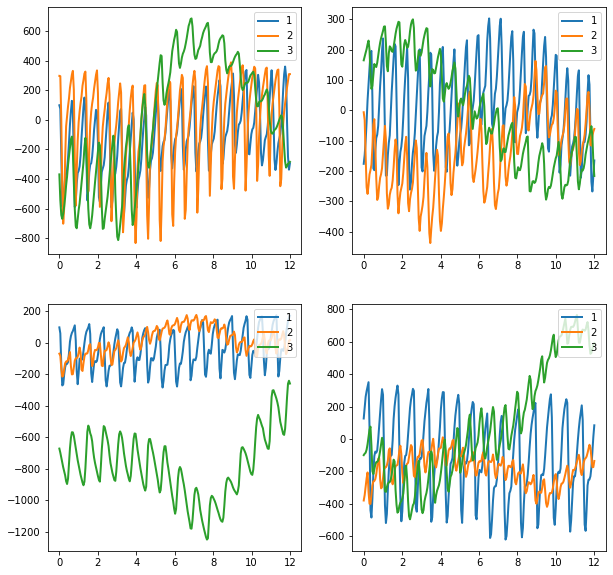

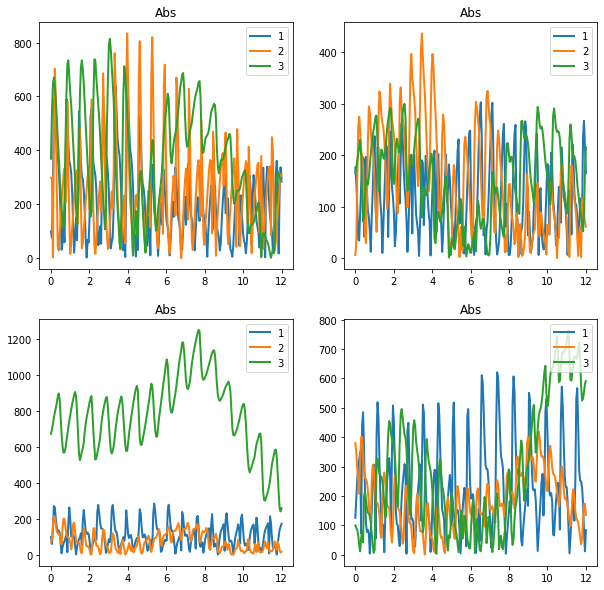

In [44]:
def plot_all_in_one(idx, is_abs=False):
    plt.plot(t, np.abs(low_data[idx]) if is_abs else low_data[idx] , linewidth=2, label='1')
    plt.plot(t, np.abs(medium_data[idx]) if is_abs else medium_data[idx], linewidth=2, label='2')
    plt.plot(t, np.abs(panic_data[idx]) if is_abs else panic_data[idx], linewidth=2, label='3')
    plt.legend(fontsize=10, loc='upper right')

    # plt.show()
plt.figure(figsize=(10,10))
for i in range(0,4):
    plt.subplot(2, 2, i+1)
    plot_all_in_one(i, False)
plt.show()
plt.figure(figsize=(10,10))

for i in range(0,4):
    plt.subplot(2, 2, i+1)
    plt.title("Abs")
    plot_all_in_one(i, True)


In [ ]:
plt.plot(t, low_data[0], linewidth=2, label='1')
plt.plot(t, medium_data[0], linewidth=2, label='2')
plt.plot(t, panic_data[0], linewidth=2, label='3')
plt.show()

In [47]:
from scipy.fft import fft, fftfreq
SAMPLE_RATE = 20
N = SAMPLE_RATE * 12
xf = fftfreq(N, 1 / SAMPLE_RATE)

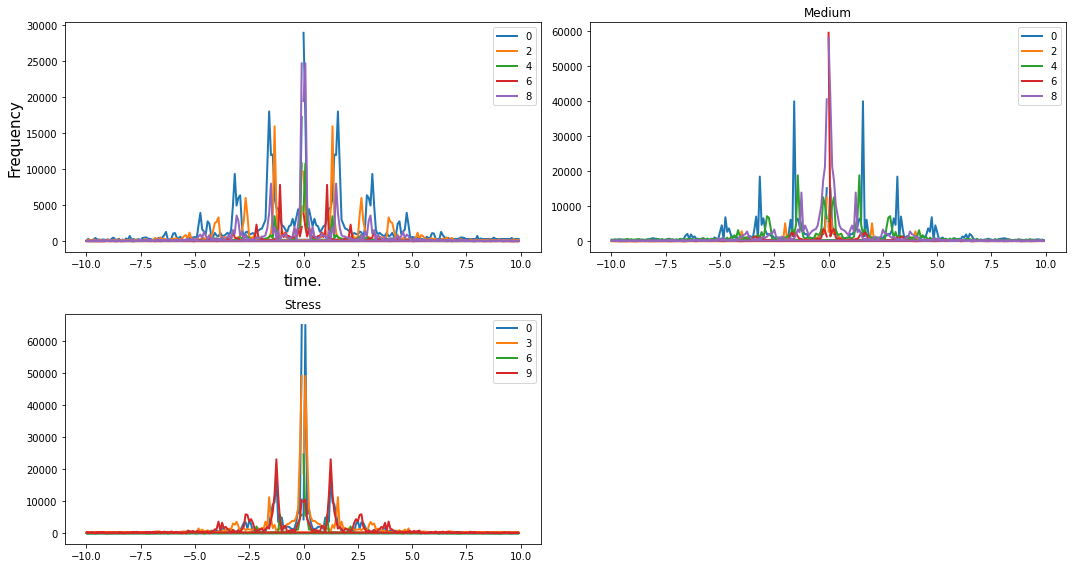

In [51]:
plt.figure(figsize=(15, 8))
plt.title("Low")

plt.subplot(2, 2, 1)
for i in range(0,10,2):
    plt.plot(xf, np.abs(fft(low_data[i])), linewidth=2, label=str(i))
plt.xlabel('time.', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(fontsize=10, loc='upper right')
plt.subplot(2, 2, 2)
plt.title("Medium")

for i in range(0,10,2):
    plt.plot(xf, np.abs(fft(medium_data[i])), linewidth=2, label=str(i))
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 3)
plt.title("Stress")
for i in range(0,10,3):
    plt.plot(xf, np.abs(fft(panic_data[i])), linewidth=2, label=str(i))
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()

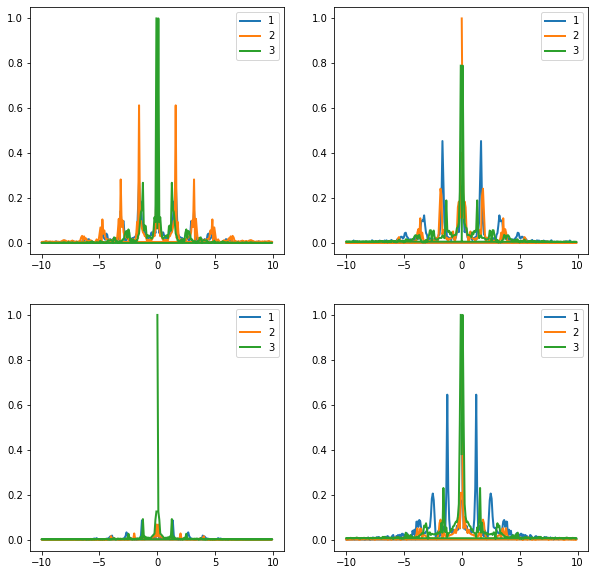

In [60]:
def plot_all_in_one(idx, normalizing=False):
    fl = np.abs(fft(low_data[idx]))
    fm = np.abs(fft(medium_data[idx]))
    fp = np.abs(fft(panic_data[idx]))
    normalize = np.amax(np.asarray([np.amax(fl),np.amax(fm),np.amax(fp)]))
    plt.plot(xf, np.abs(fl) / normalize if normalizing else np.abs(fl), linewidth=2, label='1')
    plt.plot(xf, np.abs(fm) / normalize if normalizing else np.abs(fm), linewidth=2, label='2')
    plt.plot(xf, np.abs(fp) / normalize if normalizing else np.abs(fp), linewidth=2, label='3')
    plt.legend(fontsize=10, loc='upper right')

    # plt.show()
plt.figure(figsize=(10,10))
for i in range(0,4):
    plt.subplot(2, 2, i+1)
    plot_all_in_one(i, normalizing=True)
plt.show()



In [68]:
# EDA values
from scipy import stats
low_data = np.asarray(low_data)
medium_data = np.asarray(medium_data)
panic_data = np.asarray(panic_data)
def analyze(data, val):
    print(val+" mean:", data.mean())
    # print(val+" mode:", stats.mode(data))
    print(val+" max:", data.max())
    print(val+" min:", data.min())
    print(10*"--")
analyze(low_data,"low")
analyze(medium_data,"med")
analyze(panic_data,"high")


low mean: -38.50824456197854
low max: 2047
low min: -6880
--------------------
med mean: -30.573327853984807
med max: 2047
med min: -7673
--------------------
high mean: -28.413077452096378
high max: 2047
high min: -6473
--------------------


c:\users\sergey\pycharmprojects\test\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

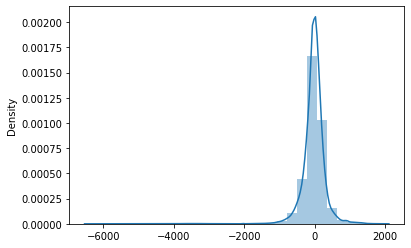

In [83]:
sns.distplot(panic_data, kde=True, bins=30)


c:\users\sergey\pycharmprojects\test\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


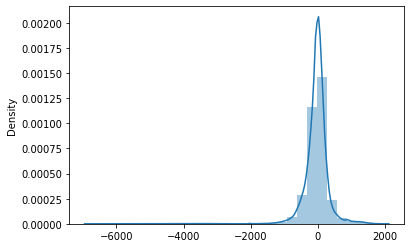

In [88]:
print(sns.distplot(low_data, kde=True, bins=30))

c:\users\sergey\pycharmprojects\test\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

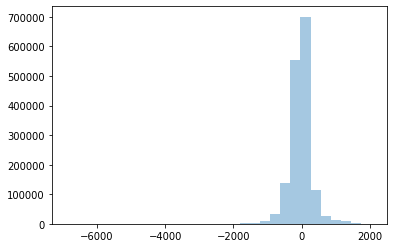

In [87]:
sns.distplot(low_data, kde=False, bins=30)


In [ ]:
# not sure, but seems to be distribution of the signal value

c:\users\sergey\pycharmprojects\test\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


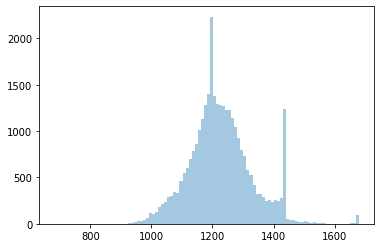

In [44]:
sns.distplot(ss, kde=False, bins=100)

plt.show()